# Pandas - Rolling method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

In [2]:
# Build a dataframe
df = pd.read_csv('file.csv',header=0) #add your file name
df.head()

,time,close,high,low,open,volume
0,1483228740,968.29,968.29,968.29,968.29,0
1,1483228800,968.70,968.76,968.49,968.29,12993
2,1483228860,968.43,968.70,967.20,968.70,73800
3,1483228920,967.21,968.00,967.21,968.43,3500
4,1483228980,966.97,967.21,966.74,967.21,15969


In [3]:
# Changing unix time to datetime
df['time'] = pd.to_datetime(df['time'], unit="s")
df.head()

,time,close,high,low,open,volume
0,2016-12-31 23:59:00,968.29,968.29,968.29,968.29,0
1,2017-01-01 00:00:00,968.70,968.76,968.49,968.29,12993
2,2017-01-01 00:01:00,968.43,968.70,967.20,968.70,73800
3,2017-01-01 00:02:00,967.21,968.00,967.21,968.43,3500
4,2017-01-01 00:03:00,966.97,967.21,966.74,967.21,15969


In [4]:
# Setting time column as index for slicing
df.set_index('time', drop=True, inplace=True)

In [5]:
# Extracting daily time series from minute tick rows
df = df[1::1440]
df.head()

,close,high,low,open,volume
time,,,,,
2017-01-01,968.70,968.76,968.49,968.29,12993
2017-01-02,1001.28,1001.28,1001.15,1001.15,2891
2017-01-03,1022.44,1022.59,1022.36,1022.76,24000
2017-01-04,1038.47,1038.47,1037.29,1036.90,15555
2017-01-05,1152.00,1154.06,1150.76,1152.00,46200


<IPython.core.display.Javascript object>


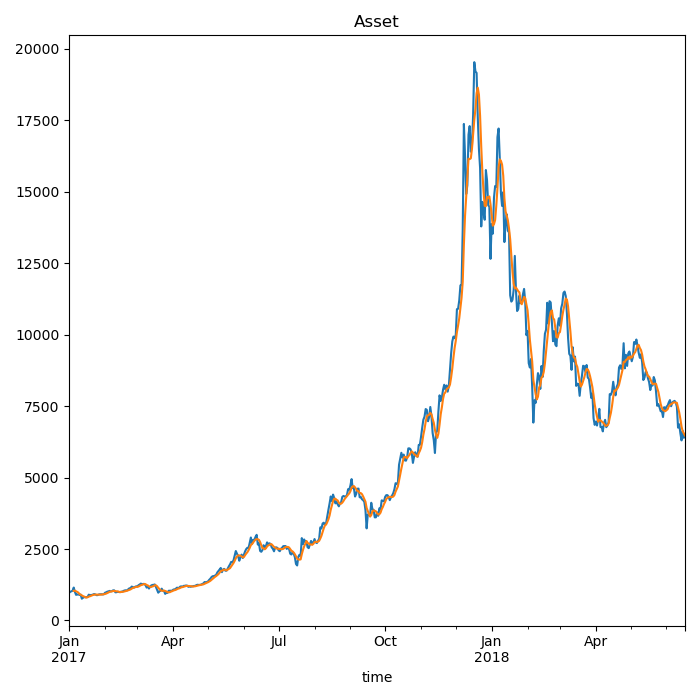

In [6]:
# Rolling over the data. Ploting a 5 day mean aka simple moving average
win_len = 5
df_btc_roll = df.rolling(win_len).mean()
ax = df['close'].plot(figsize=(7,7), title='Asset')
df_btc_roll['close'].plot()
plt.tight_layout()
plt.show()